# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  

Created by NAMES (SJSU IDs):  Huy Tran(018235100), Michael Lac(017985071), Esha Hooda (014796990)

Last updated: 10/18

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Download latest version
path = kagglehub.dataset_download("artyomkruglov/gaming-profiles-2025-steam-playstation-xbox")

# Load the main dataset (adjust filename as needed)
# Assuming you want to load the players data from the steam directory as an example
df = pd.read_csv(os.path.join(path, 'steam', 'players.csv'))

print("=== Q1: Data Quality Assessment ===")
print(f"Dataset shape: {df.shape}")
print("\nBasic info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

100%|██████████| 889M/889M [00:13<00:00, 71.0MB/s]

Extracting files...


=== Q1: Data Quality Assessment ===
Dataset shape: (424683, 3)

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424683 entries, 0 to 424682
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   playerid  424683 non-null  int64 
 1   country   246815 non-null  object
 2   created   377014 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.7+ MB
None

Missing values:
playerid         0
country     177868
created      47669
dtype: int64

Data types:
playerid     int64
country     object
created     object
dtype: object


In [3]:
# Fill missing values in the 'country' column with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Verify that missing values in 'country' have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
playerid        0
country         0
created     47669
dtype: int64


### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

Question: Which 10 countries have the most Steam Players?

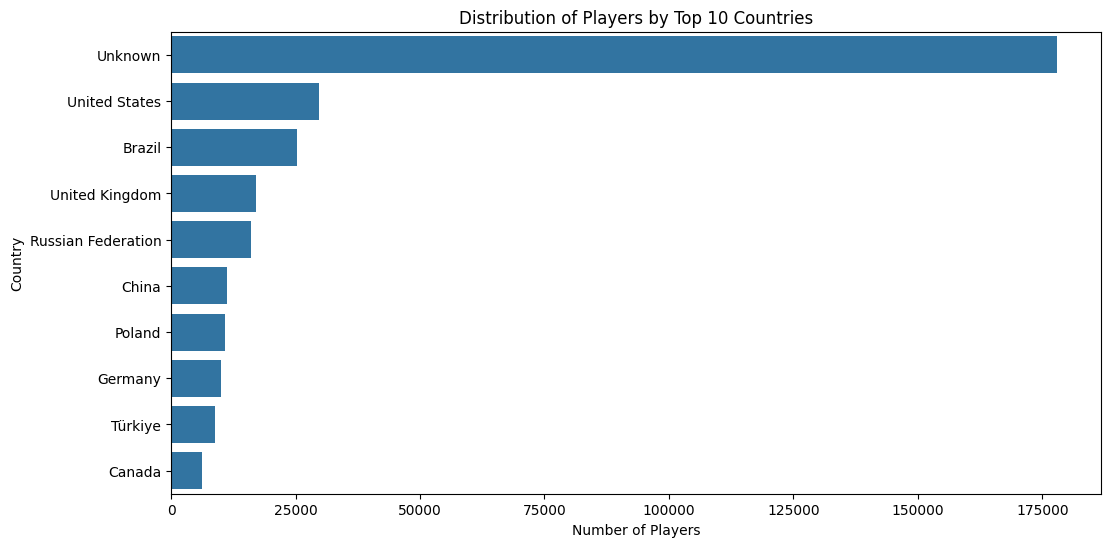

In [4]:
# Get the top 10 countries
top_10_countries = df['country'].value_counts().nlargest(10).index

# Create a count plot of the top 10 countries
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=df[df['country'].isin(top_10_countries)], y='country', order=top_10_countries)
plt.title('Distribution of Players by Top 10 Countries')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()

### Q3: Come up with a another unique question. This question must use map() or apply()

Question: Which years have the most account created?

In [5]:
# Convert the 'created' column to datetime objects, coercing errors to NaT
df['created'] = pd.to_datetime(df['created'], errors='coerce')

# Extract the year using apply() and create a new column 'creation_year'
df['creation_year'] = df['created'].apply(lambda x: x.year if pd.notnull(x) else np.nan)

# Display the first few rows with the new column and check data types
print(df[['created', 'creation_year']].head())
print("\nData types after extracting year:")
print(df[['created', 'creation_year']].dtypes)

              created  creation_year
0 2016-03-02 06:14:20         2016.0
1 2011-04-10 17:10:06         2011.0
2 2011-09-28 21:43:59         2011.0
3 2014-09-24 19:52:47         2014.0
4 2013-12-26 00:25:50         2013.0

Data types after extracting year:
created          datetime64[ns]
creation_year           float64
dtype: object


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [6]:
# Drop rows with NaN in 'creation_year' for plotting
creation_year_data_plotly = df.dropna(subset=['creation_year'])

# Count the occurrences of each creation year
creation_year_counts = creation_year_data_plotly['creation_year'].value_counts().sort_index().reset_index()
creation_year_counts.columns = ['creation_year', 'count']

# Create an interactive bar plot using Plotly Express
fig = px.bar(creation_year_counts,
             x='creation_year',
             y='count',
             title='Interactive Distribution of Account Creation Years')

# Update x-axis to display years as integers
fig.update_layout(xaxis = dict(tickmode = 'linear'))

fig.show()

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

Additional dataset: A dataset with country-level inforomation like population, and gdp we can use this to normalize the player count by percentage of population
combining the dataset
```python
# 1. Load all necessary datasets
players_df = pd.read_csv('steam/players.csv')
purchases_df = pd.read_csv('steam/purchased_games.csv')
games_df = pd.read_csv('steam/games.csv')
country_data_df = pd.read_csv('world_bank_data.csv') # Columns: ['country', 'population', 'gdp_per_capita']
# 2. Combine player and purchase data
player_purchases = pd.merge(players_df, purchases_df, on='playerid', how='inner')

# 3. Add game names and genres
full_game_data = pd.merge(player_purchases, games_df, on='appid', how='left')

# 4. Add demographic data to the combined dataset
final_df = pd.merge(full_game_data, country_data_df, on='country', how='left')
```
we would have to reshape it with groupby() to aggregate the data so we can answer questions like "what are the most popular games in the United States"

Visualization: Top 3 countries where players come from (by percentage of population)
![visualization](IMG_0105.jpg)